In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [9]:
sns.set_style("whitegrid")

In [13]:
df = pd.read_csv("C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/behavioral-bias-detector/data/processed/TCS_panic_signals.csv")
df.head()

,date,close,high,low,open,volume,daily_return,return_5d,return_10d,volatility_10d,rolling_max,drawdown,volume_mean_20d,volume_std_20d,volume_zscore,high_52w,dist_from_52w_high,panic_sell
0,2020-01-13,1919.979858,1945.049432,1915.027149,1944.085341,2843893,-0.010481,-0.004590,0.003275,0.012769,1989.490601,-0.034939,3603601.00,1.934266e+06,-0.392763,1989.490601,-0.034939,False
1,2020-01-14,1934.487061,1954.560484,1924.056045,1924.056045,2948452,0.007556,0.000476,0.020910,0.012398,1989.490601,-0.027647,3472314.75,1.881876e+06,-0.278373,1989.490601,-0.027647,False
2,2020-01-15,1952.018066,1955.612060,1923.354499,1939.833926,2620681,0.009062,-0.012571,0.027357,0.012592,1989.490601,-0.018835,3300365.15,1.787783e+06,-0.380183,1989.490601,-0.018835,False
3,2020-01-16,1962.448975,1971.389873,1941.586736,1952.061619,3117214,0.005344,0.011041,0.037610,0.012335,1989.490601,-0.013592,3043671.80,1.355948e+06,0.054237,1989.490601,-0.013592,False
4,2020-01-17,1945.181641,1975.379203,1939.834519,1964.159150,3281059,-0.008799,0.002508,0.008384,0.011468,1989.490601,-0.022272,2895149.50,1.129934e+06,0.341533,1989.490601,-0.022272,False


In [15]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").reset_index(drop=True)

df.head()

,date,close,high,low,open,volume,daily_return,return_5d,return_10d,volatility_10d,rolling_max,drawdown,volume_mean_20d,volume_std_20d,volume_zscore,high_52w,dist_from_52w_high,panic_sell
0,2020-01-13,1919.979858,1945.049432,1915.027149,1944.085341,2843893,-0.010481,-0.004590,0.003275,0.012769,1989.490601,-0.034939,3603601.00,1.934266e+06,-0.392763,1989.490601,-0.034939,False
1,2020-01-14,1934.487061,1954.560484,1924.056045,1924.056045,2948452,0.007556,0.000476,0.020910,0.012398,1989.490601,-0.027647,3472314.75,1.881876e+06,-0.278373,1989.490601,-0.027647,False
2,2020-01-15,1952.018066,1955.612060,1923.354499,1939.833926,2620681,0.009062,-0.012571,0.027357,0.012592,1989.490601,-0.018835,3300365.15,1.787783e+06,-0.380183,1989.490601,-0.018835,False
3,2020-01-16,1962.448975,1971.389873,1941.586736,1952.061619,3117214,0.005344,0.011041,0.037610,0.012335,1989.490601,-0.013592,3043671.80,1.355948e+06,0.054237,1989.490601,-0.013592,False
4,2020-01-17,1945.181641,1975.379203,1939.834519,1964.159150,3281059,-0.008799,0.002508,0.008384,0.011468,1989.490601,-0.022272,2895149.50,1.129934e+06,0.341533,1989.490601,-0.022272,False


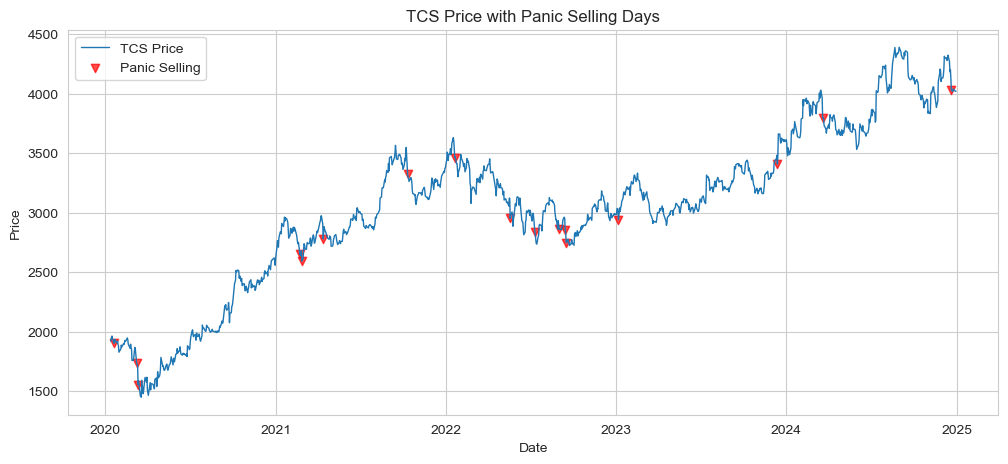

In [17]:
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["close"], label="TCS Price", linewidth=1)

panic_days = df[df["panic_sell"]]

plt.scatter(
    panic_days["date"],
    panic_days["close"],
    color="red",
    label="Panic Selling",
    marker="v",
    alpha=0.7
)

plt.title("TCS Price with Panic Selling Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


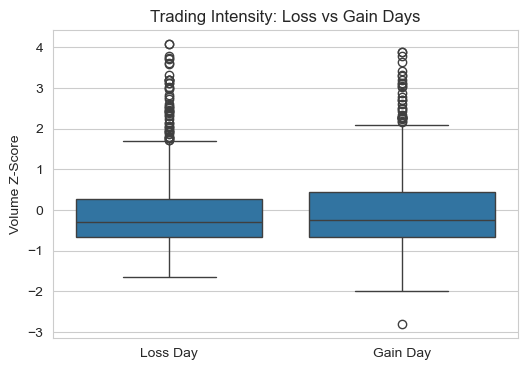

In [19]:
df["day_type"] = np.where(df["daily_return"] < 0, "Loss Day", "Gain Day")

plt.figure(figsize=(6,4))
sns.boxplot(
    x="day_type",
    y="volume_zscore",
    data=df
)

plt.title("Trading Intensity: Loss vs Gain Days")
plt.xlabel("")
plt.ylabel("Volume Z-Score")
plt.show()


C:\Users\Abhi\AppData\Local\Temp\ipykernel_26120\136976388.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("drawdown_zone")["volume_zscore"]


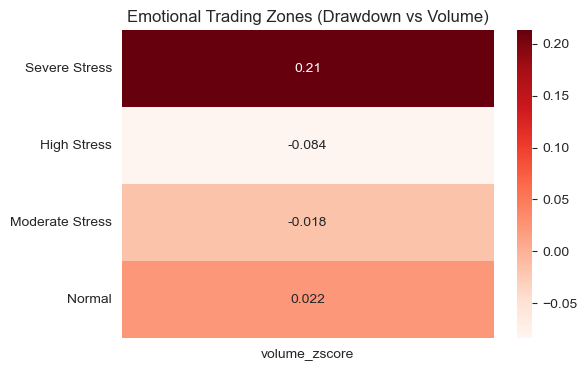

In [21]:
# Bin drawdown into zones
df["drawdown_zone"] = pd.cut(
    df["drawdown"],
    bins=[-1, -0.2, -0.1, -0.05, 0],
    labels=["Severe Stress", "High Stress", "Moderate Stress", "Normal"]
)

heatmap_data = (
    df.groupby("drawdown_zone")["volume_zscore"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.heatmap(
    heatmap_data.set_index("drawdown_zone"),
    annot=True,
    cmap="Reds"
)

plt.title("Emotional Trading Zones (Drawdown vs Volume)")
plt.ylabel("")
plt.show()


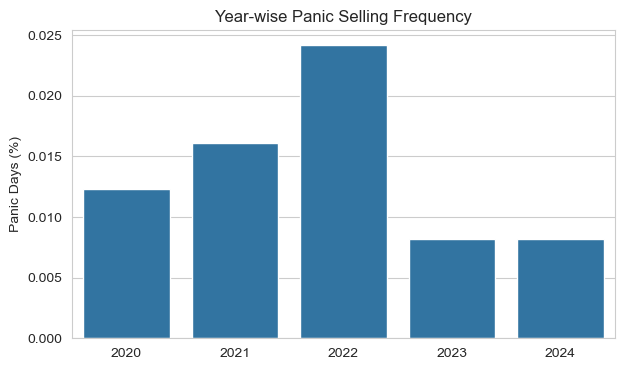

In [23]:
df["year"] = df["date"].dt.year

panic_yearly = (
    df.groupby("year")["panic_sell"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(
    x="year",
    y="panic_sell",
    data=panic_yearly
)

plt.title("Year-wise Panic Selling Frequency")
plt.ylabel("Panic Days (%)")
plt.xlabel("")
plt.show()


In [25]:
bias_score = (
    df["panic_sell"].mean() * 30 +
    (df[df["daily_return"] < 0]["volume_zscore"].mean()) * 25 +
    (df[df["drawdown"] < -0.05]["volume_zscore"].mean()) * 25 +
    abs(df["dist_from_52w_high"].mean()) * 20
)

round(bias_score, 2)


0.68

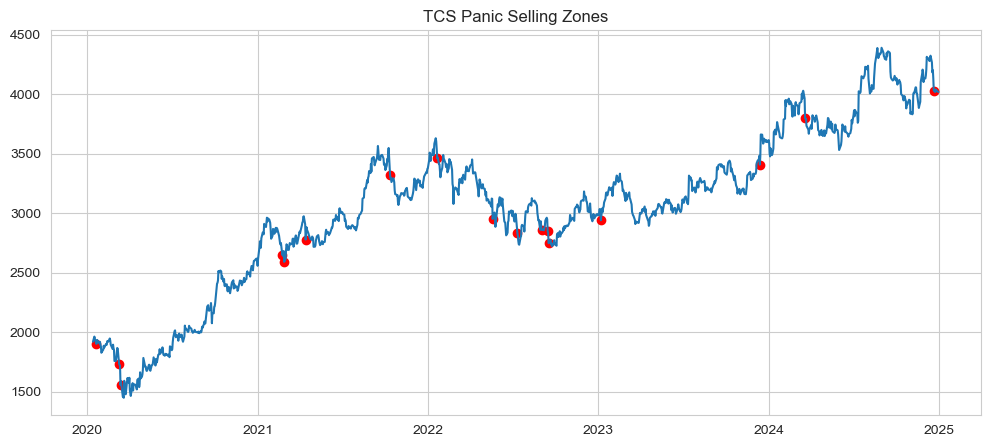

In [33]:
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["close"])
plt.scatter(panic_days["date"], panic_days["close"], color="red")
plt.title("TCS Panic Selling Zones")
plt.savefig("C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/behavioral-bias-detector/visuals/tcs_panic_zones.png")